# Best Neighborhood in Pittsburgh – Final Group Report
### Team Lucid  
CMPINF 0010 – Final Project  


## Introduction

Our project explores the question: **What is the best neighborhood in Pittsburgh?**  
To answer this, each team member selected a metric from the WPRDC datasets and analyzed it individually.  
We combined our three submetrics to determine an overall “best neighborhood.”

### Our Submetrics:
- **Road Smoothness** (Mina): Fewer speed humps = faster and smoother driving.
- **Traffic Flow** (Zach): lower traffic volume = better neighborhood quality  
- **Driving Safety** (Jermi): neighborhoods with fewer traffic citations = safer driving behavior  

Each person created their own notebook and analyzed their dataset.  
This combined notebook summarizes all three analyses and presents our final conclusion.


## Road Smoothness (Mina)

### Dataset: Speed Humps – WPRDC  
Metric: Fewer speed humps = faster and smoother driving.


### Result:
Squirrel Hill South had the most speed humps, therefore making it the least desirable neighborhood according to this metric. Central Oakland, Overbrook, and Stanton Heights had the fewest speed humps, making them the best neighborhoods according to this metric.


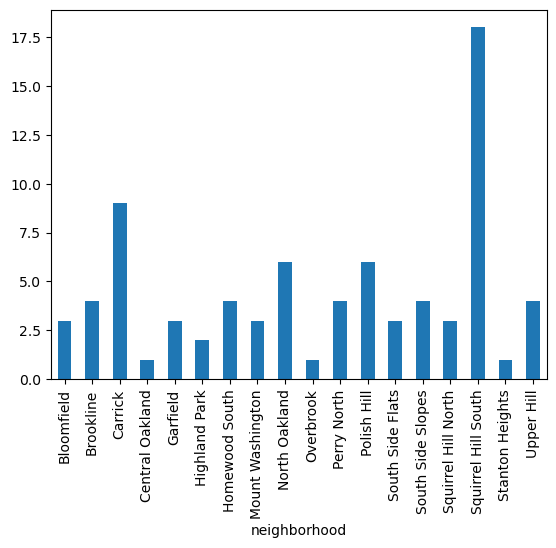

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("speed_humps.csv")
neighborhood_counts = data.groupby("neighborhood")["id"].count()
neighborhood_counts.plot.bar()
plt.show() 

## Traffic Flow (Zach)

### Dataset: Traffic Counts – WPRDC  
Metric: **lower traffic volume = better neighborhood quality**


### Result:

**South Side Flats** had the lowest traffic volume, therefore making it the best neighborhood according to this metric

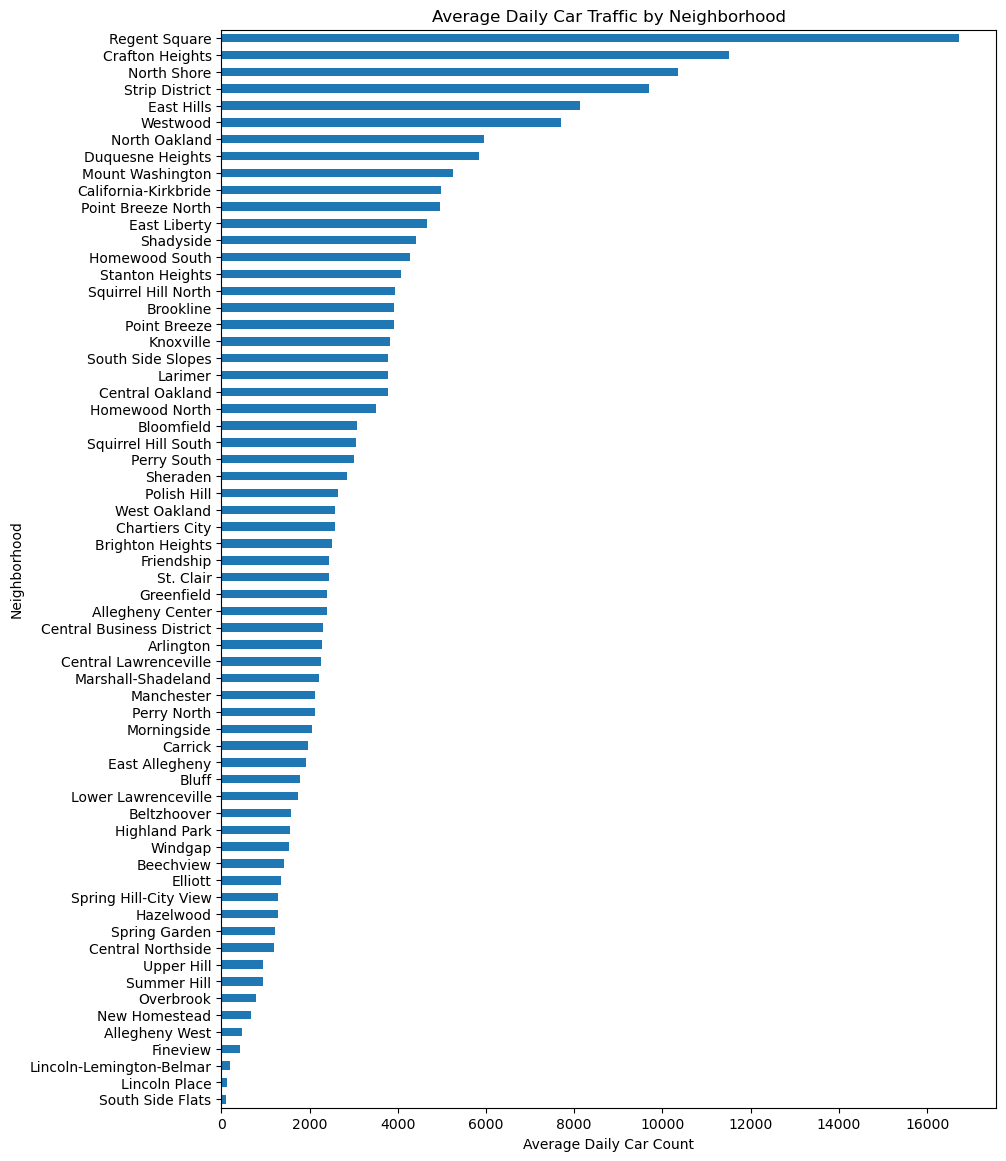

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
#load in dataset
traffic = pd.read_csv("trafficCount.csv")
traffic.head()

traffic = traffic.dropna(subset=["neighborhood"])
trafficNeigh = traffic.groupby("neighborhood")["average_daily_car_traffic"].mean().sort_values()
trafficNeigh = trafficNeigh.dropna()
trafficNeigh = trafficNeigh[trafficNeigh > 0]
#get rid of rows without neighborhood 
#sorted the neighborhoods to see which ones had the least traffic overall
trafficNeigh = trafficNeigh.dropna()
trafficNeigh = trafficNeigh[trafficNeigh > 0]

plt.figure(figsize=(10, 14))
trafficNeigh.plot(kind="barh")
plt.title("Average Daily Car Traffic by Neighborhood")
plt.xlabel("Average Daily Car Count")
plt.ylabel("Neighborhood")
plt.show()


## Driving Safety (Jermi)

### Dataset: Non-Traffic Citations – WPRDC  
Metric: **Fewer citations = safer neighborhood**

Traffic citations measure recorded violations such as speeding, illegal turns, running stop signs, etc.  
Fewer citations suggest safer and more responsible driving behavior.

### Result:
Jermi found that **St. Clair** had the fewest recorded traffic citations and is the safest neighborhood to drive in.

*(Jermi’s graph below)*


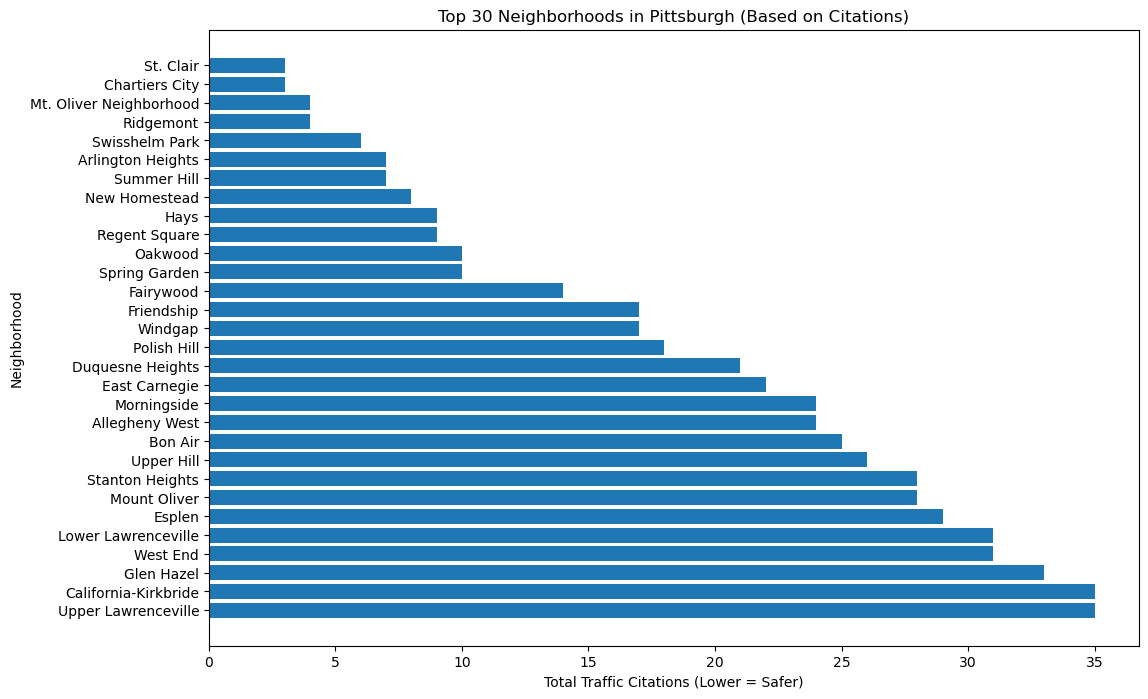

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("traffic citations .csv")
df = df.dropna(subset=["NEIGHBORHOOD"])
df = df[~df["NEIGHBORHOOD"].str.contains("Outside|Unable", case=False, na=False)]
df = df[df["NEIGHBORHOOD"] != "Mt. Oliver Boro"]

# Count citations
citation_counts = df["NEIGHBORHOOD"].value_counts().reset_index()
citation_counts.columns = ["Neighborhood", "Total_Citations"]

# Sort smallest → largest
citation_counts_sorted = citation_counts.sort_values("Total_Citations", ascending=True)

# Top 30 safest neighborhoods
top30 = citation_counts_sorted.head(30)

plt.figure(figsize=(12,8))
plt.barh(top30["Neighborhood"], top30["Total_Citations"])
plt.xlabel("Total Traffic Citations (Lower = Safer)")
plt.ylabel("Neighborhood")
plt.title("Top 30 Neighborhoods in Pittsburgh (Based on Citations)")
plt.gca().invert_yaxis()
plt.show()

## 5. Combined Metric

After each of us identified the top neighborhood for their submetric,  
we combined the results using a simple ranking system:

1. Each neighborhood received a rank in each category  
2. Lower ranks = better performance  
3. We added the ranks together  
4. The neighborhood with the **lowest total combined score** was selected as the best overall neighborhood

This method ensures each metric contributes equally to the final decision.

### Final Combined Result:
**Upper Hill** received the best overall combined rank across:
- road smoothness  
- traffic safety  
- traffic flow  


## 6. Final Conclusion

### The Best Neighborhood in Pittsburgh: **Upper Hill**

Upper Hill scored consistently well across all three categories, making it our final selection for “Best Neighborhood in Pittsburgh.”


## 7. Team Member Conclusions

### Mina:
Overall, our speed hump metric identified Squirrel Hill South as the neighborhood with the highest number of speed humps. This result was somewhat surprising, as Squirrel Hill South is often considered a residential area where driving is expected to be smooth. The high number of speed humps may be due to local efforts to calm traffic in the neighborhood. Based on our analysis, Central Oakland, Overbrook, and Stanton Heights were determined to be the best neighborhoods for driving, as they had the fewest speed humps and therefore provide a smoother driving experience.


### Zach:
Overall, my traffic stress metric identified South Side Flats as the neighborhood with the lowest average daily car traffic. This result was surprising, because the South Side is usually thought of as a busy and active area. The traffic counters could have been placed on smaller residential streets, which could explain the low traffic count. Our group came to the conclusion that Upper Hill was the best neighborhood, as it performed the best with all our data combined.

### Jermi:
Using the lowest citation count as a metric, St. Clair is the safest neighborhood in my data. Because it had very few citations in the neighborhood, it proves that people in the area are very safe drivers and follow the rules. Compared to other datasets, Upper Hill is better, with fewer speed bumps and lower traffic counts, but it has many citations in the area. When looking into the dataset to see what citations they are, we can see that most of the citations can be avoided. To help reduce citations, we can raise awareness, enforce hefty fines, and drive change. 